In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS
import pathlib
from pathlib import Path
from shapely import wkt
from tqdm import tqdm
import timeit
# set the working directory
BASE_DIR = Path.cwd()
import seaborn as sns
from plotnine import *
from plotnine import ggplot, aes, facet_grid, labs, geom_point
import seaborn as sns
import random
import branca
# define the exported folder path
# Check if folder exists
folder_path = pathlib.Path(BASE_DIR.parent.joinpath("Exported_Files","census_tract","agg_network","Mar042022","CensusTract_FT_FullNetwork"))
folder_path.mkdir(parents=True, exist_ok=True)

# print(BASE_DIR)

In [98]:
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_FT_CT.csv"))
Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])

# # drop columns
# dfmerged.drop(columns=["category_y","category_x","FT","tractce10"],inplace=True)
#
# # split the tractce10_FT
# dfmerged[["tractce10","FT"]] = dfmerged["tractce10_FT"].str.split("_",expand=True)
# dfmerged["tractce10"] = dfmerged["tractce10"].astype(str)
dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT

dfmerged.loc[(~dfmerged["FT"].isin([4,7,12,15,11,13])) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(~dfmerged["FT"].isin([4,7,12,15,11,13])) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] / dfmerged.loc[(~dfmerged["FT"].isin([4,7,12,15,11,13])) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2
# Set the PCT_PUDO in category=1 equal to 0,

In [99]:
# dfmerged.loc[dfmerged["Accident_Year"]==2016,["tractce10","FT","Accident_Year","PUDO","PCT_PUDO","new_pct"]]
# [1, 2, 3, 5]

,tractce10,FT,Accident_Year,PUDO,PCT_PUDO,new_pct
1,10100,11,2016,1500.71669,0.246469,NaN
3,10100,12,2016,296.98330,0.048775,NaN
5,10100,15,2016,634.18333,0.104155,NaN
7,10100,4,2016,1731.38325,0.284352,NaN
9,10100,7,2016,1925.59997,0.316249,NaN
...,...,...,...,...,...,...
1623,980900,15,2016,621.49999,0.183910,NaN
1625,980900,2,2016,584.31666,0.172907,0.754233
1627,980900,4,2016,170.91668,0.050577,NaN
1629,980900,5,2016,190.40001,0.056342,0.245767


In [2]:
# Base dataframe
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

In [23]:
# # Base dataframe
# dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
# Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
# dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
# dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])
#
# # correct the PUDO
# dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] / dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2
# # Set the PCT_PUDO in category=1 equal to 0,
# dfmerged.loc[(dfmerged["category"]==1) & (dfmerged["Accident_Year"]!=2010),"new_pct"]=0
# dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
# dfmerged.rename(columns={"PUDO":"old_PUDO", "new_PUDO":"PUDO"},inplace=True)
# dfmerged.to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
#
# dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

In [ ]:
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] / dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2 and 3 such that category PUDO volume in category 1 is 0
# dfmerged["new_pct"].fillna(0,inplace=True)
# dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
# dfmerged.rename(columns={"PUDO":"old_PUDO", "new_PUDO":"PUDO"},inplace=True)

<AxesSubplot:>

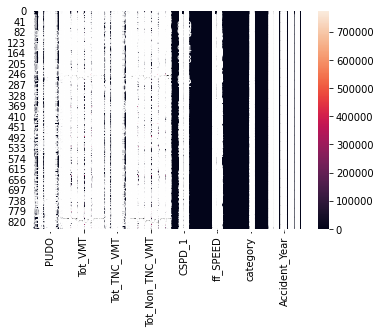

In [24]:
# main fields:
dfSample = dfmerged[["PUDO","Tot_VMT", "Tot_TNC_VMT","Tot_Non_TNC_VMT","CSPD_1","ff_SPEED","category","Accident_Year"]]
sns.heatmap(data = dfSample,annot=True)

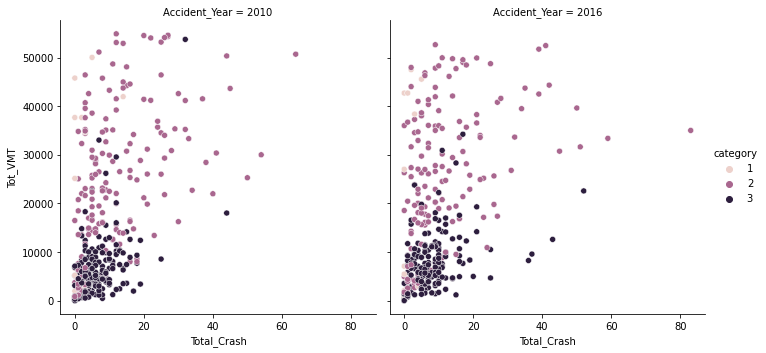

In [74]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==3)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_Tot_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

# I think both are similar observations
# Category 1 : is sporadic in nature
# Category 2 : is much sharper (I think its fits log or a second order)
# Category 3 : is very linear in nature

In [ ]:
# Is same for Tot_TNC_VMT and Tot_Non_TNC_VMT

In [1]:
# exclude VMT>50K (main SF bridges)
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==1)] # can visualize graph by category types
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="Tot_TNC_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : sporadic in nature
# Category 2 : sharper but not as much seen in Tot_VMT
# Category 3 : linear in nature

# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_Tot_TNC_VMT.png")
# # Saving the Seaborn Figure:
# plt.savefig(outfp,dpi=300)

NameError: name 'dfmerged' is not defined

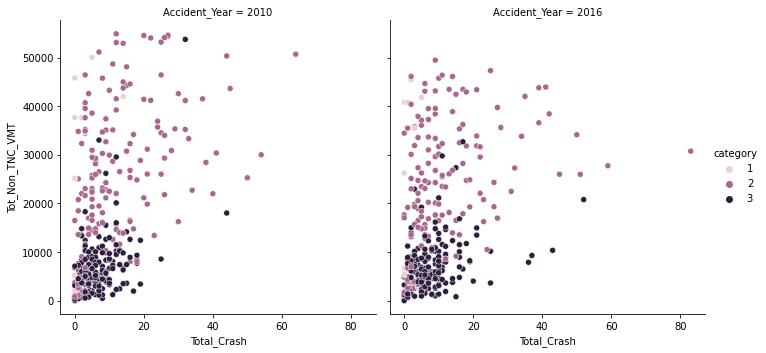

In [77]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="Tot_Non_TNC_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : sporadic in nature
# Category 2 : sharper (linear) but not as much seen in Tot_VMT
# Category 3 : linear in nature

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_Tot_Non_TNC_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

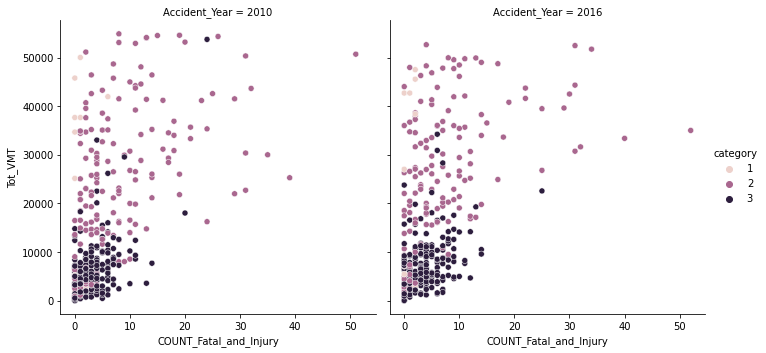

In [78]:
# What about the Fatal_Injury crashes vs Tot_VMT

# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="COUNT_Fatal_and_Injury", y="Tot_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : large number of zero's Fatal&Crashes, max being 5 or 6
# Category 2 : is much sharper (similar to tot_VMT)
# Category 3 : I dont think it is relational

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Fatal_Injury_Crashes_vs_Tot_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

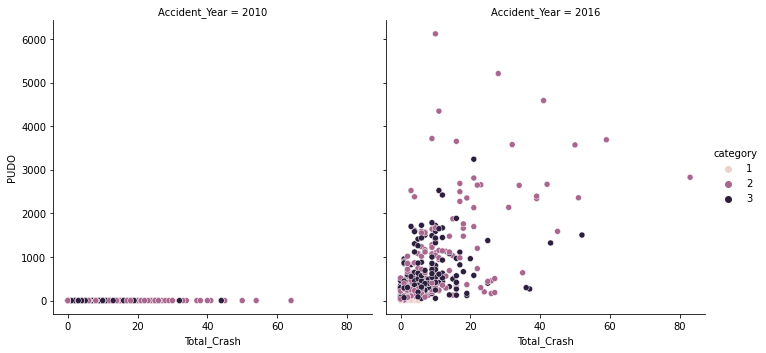

In [80]:
# Total Crash vs PUDO

# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="PUDO", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : positive and linear (though noisy)
# Category 3 : positive and linear

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_PUDO.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

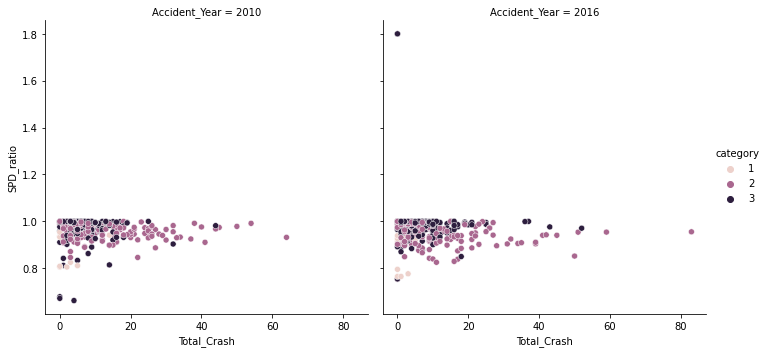

In [84]:
# Total Crash vs SPEED_ratio?

# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="SPD_ratio", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : negative and linear (more crashes, less speed ratio)
# Category 3 : negative and linear (more crashes, less speed ratio, mostly clustered around SPD_ratio>=0.80 and <1.0)
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_SPD_ratio.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

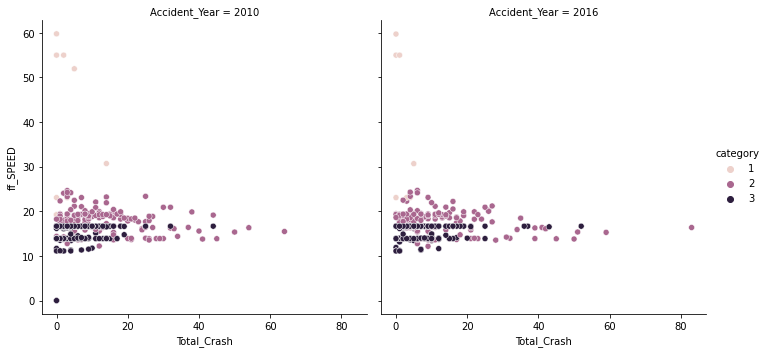

In [85]:
# Total Crash vs ff_SPEED?
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="ff_SPEED", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : negative and linear (more crashes, less speed ratio)
# Category 3 : negative and linear (more crashes, less speed ratio, mostly clustered around SPD_ratio>=0.80 and <1.0)
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_ff_SPEED.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

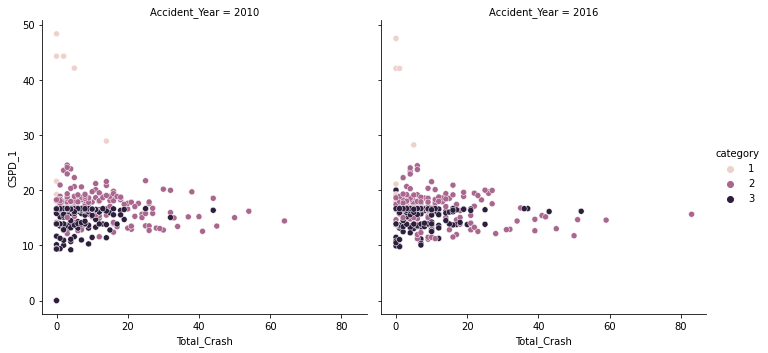

In [86]:
# Total Crash vs CSPD_1?
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="CSPD_1", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_CSPD_1.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

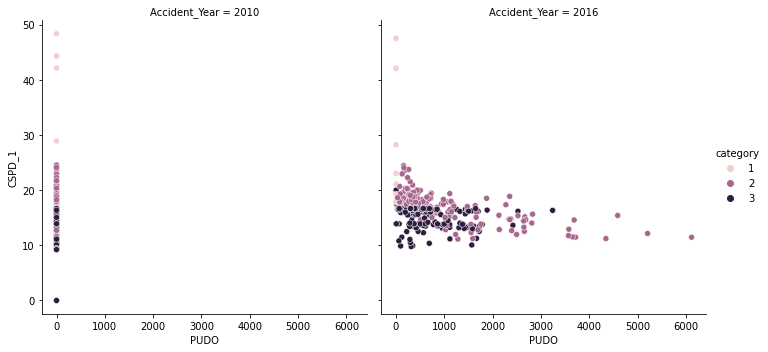

In [91]:
# PUDO vs CSPD_1?
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==3)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="PUDO", y="CSPD_1", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : negative and linear (more crashes, less speed ratio)
# Category 3 : negative and linear (more crashes, less speed ratio, mostly clustered around SPD_ratio>=0.80 and <1.0)
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"PUDO_vs_CSPD_1.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [25]:
dfSample.corr()

,PUDO,Tot_VMT,Tot_TNC_VMT,Tot_Non_TNC_VMT,CSPD_1,ff_SPEED,category,Accident_Year
PUDO,1.000000,0.105820,0.627318,0.077912,-0.151223,-0.124462,-4.519900e-02,3.369909e-01
Tot_VMT,0.105820,1.000000,0.476614,0.999101,0.612282,0.686555,-5.736314e-01,3.069943e-02
Tot_TNC_VMT,0.627318,0.476614,1.000000,0.438925,0.201369,0.279206,-3.335012e-01,4.116495e-01
Tot_Non_TNC_VMT,0.077912,0.999101,0.438925,1.000000,0.616093,0.688253,-5.702183e-01,1.153055e-02
CSPD_1,-0.151223,0.612282,0.201369,0.616093,1.000000,0.968778,-6.660821e-01,-1.559028e-02
ff_SPEED,-0.124462,0.686555,0.279206,0.688253,0.968778,1.000000,-6.945732e-01,1.425407e-03
category,-0.045199,-0.573631,-0.333501,-0.570218,-0.666082,-0.694573,1.000000e+00,-2.431123e-16
Accident_Year,0.336991,0.030699,0.411650,0.011531,-0.015590,0.001425,-2.431123e-16,1.000000e+00


In [5]:
# How are crashes spread/behaving???

C:\Users\Goyal\.virtualenvs\Overpass_Turbo-ZwXzihL_\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


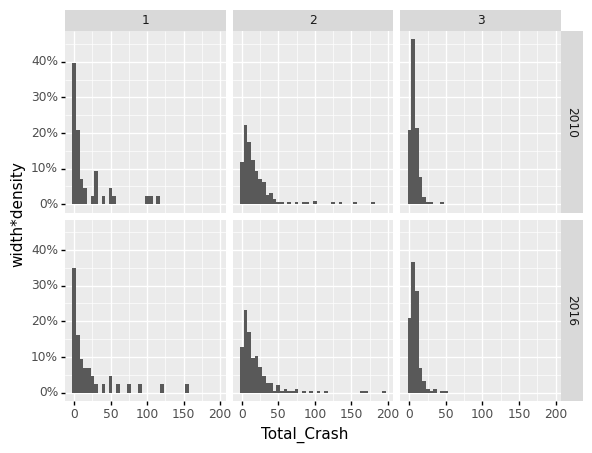

<ggplot: (129618955770)>

In [32]:
from mizani.formatters import percent_format
dfcrashes_sample = dfmerged.copy()
(
        ggplot(dfcrashes_sample, aes(x="Total_Crash",
                                     y=after_stat('width*density') # show proportion
                                     # y=after_stat('count') # show crash count
                                    ))
        + facet_grid(facets="Accident_Year~category")
        + geom_histogram(binwidth=5)
        + scale_y_continuous(labels=percent_format()) # display labels as a percentage
)
# As you would see, category 1 has less number of crashes (overall)
# Maximum in in category 2 (arterials) with local also amounting to high crashes


C:\Users\Goyal\.virtualenvs\Overpass_Turbo-ZwXzihL_\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Goyal\.virtualenvs\Overpass_Turbo-ZwXzihL_\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Goyal\.virtualenvs\Overpass_Turbo-ZwXzihL_\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


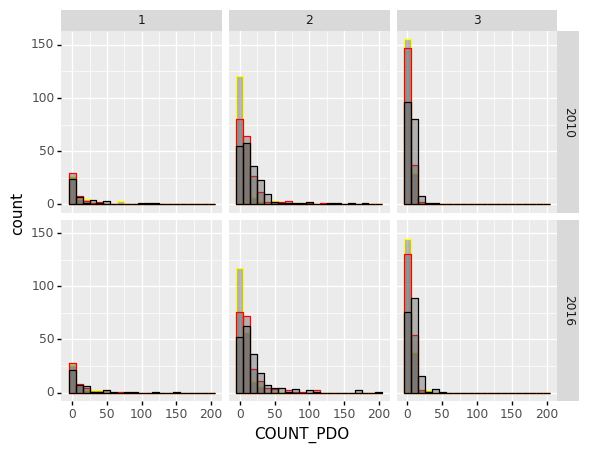

<ggplot: (129613686026)>

In [26]:
# so are the "local" road crashes KABCO or PDOs?
dfcrashes_sample = dfmerged.copy()
(
        ggplot(dfcrashes_sample, )
        + facet_grid(facets="Accident_Year~category")
        + geom_histogram(aes(x="COUNT_PDO",
                             # y=after_stat('width*density') # show proportion
                             y=after_stat('count') # show crash count
                             ),binwidth=10,color="yellow",alpha=0.4)
        + geom_histogram(aes(x="COUNT_Fatal_and_Injury",
                             # y=after_stat('width*density') # show proportion
                             y=after_stat('count') # show crash count
                             ),binwidth=10,color="red",alpha=0.4)
        + geom_histogram(aes(x="Total_Crash",
                             # y=after_stat('width*density') # show proportion
                             y=after_stat('count') # show crash count
                             ),binwidth=10,color="black",alpha=0.4)
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
)

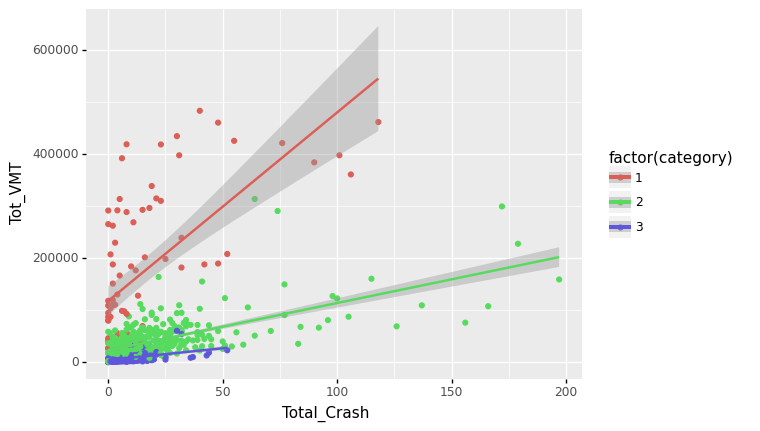

<ggplot: (129626716438)>

In [29]:
# dfcrashes_sample = dfmerged.copy()
dfcrashes_sample = dfmerged.loc[dfcrashes_sample["Tot_VMT"]<500000]
(
    (ggplot(dfcrashes_sample, aes("Total_Crash","Tot_VMT",color="factor(category)"))
     + geom_point()
     + stat_smooth(method='lm'))
)
# three distinct patterns of linear relationship

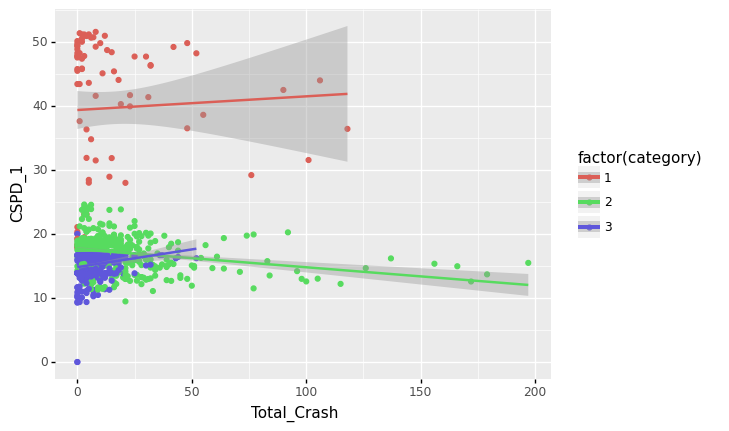

<ggplot: (186162943452)>

In [9]:
dfcrashes_sample = dfmerged.loc[dfmerged["Tot_VMT"]<460000]
(
    (ggplot(dfcrashes_sample, aes("Total_Crash","CSPD_1",color="factor(category)"))
     + geom_point()
     + stat_smooth(method='lm'))
)
# so here, we see
# Category 2 - has the highest number of crashes even when congested_speed is less than 20mph
# Category 3 - lowest number of crashes
# Category 1 - reasonable number of crashes, though not as prominent as found in cat 2

# So, what about fatality rate? Do more crashes leads to more fatal crashes?

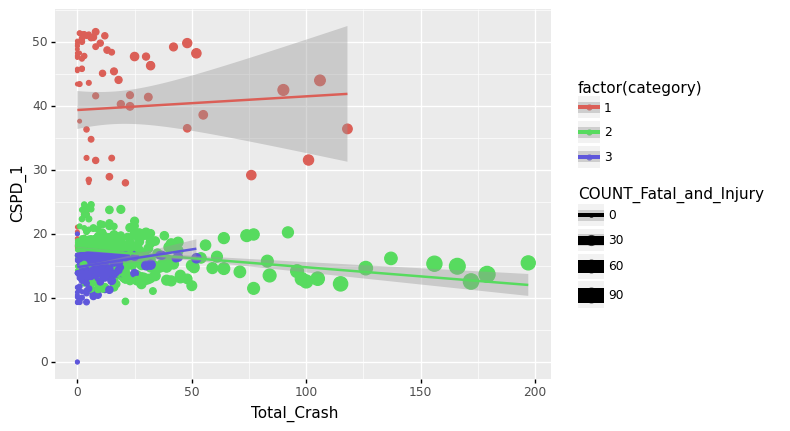

<ggplot: (186162553652)>

In [10]:
dfcrashes_sample = dfmerged.loc[dfmerged["Tot_VMT"]<460000]
(
    (ggplot(dfcrashes_sample, aes("Total_Crash","CSPD_1",color="factor(category)",size="COUNT_Fatal_and_Injury"))
     + geom_point()
     + stat_smooth(method='lm'))
)
# Nope Cat 2 still has higher share of fatality compared to Cat 1

In [10]:
# # re-proportionate the PUDO which are on category 1 to category 2 & 3 depending upon their percentages in corresponding CTs
# dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] /dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2 and 3 such that category PUDO volume in category 1 is 0
# dfmerged.loc[(dfmerged["Accident_Year"]!=2010),["tractce10", "category", "PUDO","Accident_Year","new_pct","PCT_PUDO"]]

In [ ]:
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] /
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2 and 3 such that category PUDO volume in category 1 is 0
# dfmerged["new_pct"].fillna(0,inplace=True)
# dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
# dfmerged.rename(columns={"PUDO":"old_PUDO", "new_PUDO":"PUDO"},inplace=True)

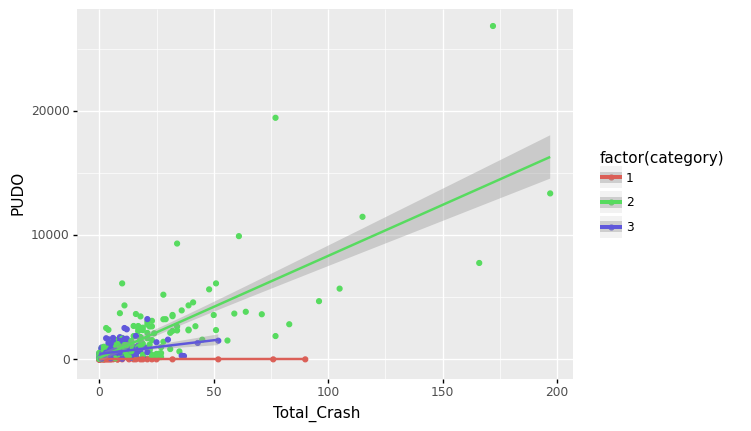

<ggplot: (129607168253)>

In [15]:
dfcrashes_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000) & (dfmerged["Accident_Year"]==2016)]
(
    (ggplot(dfcrashes_sample, aes("Total_Crash","PUDO",color="factor(category)"))
     + geom_point()
     + stat_smooth(method='lm'))
)
# Not much in category 1 or 3. Maximum PUDO occuring at the Arterial roads, which makes sense

In [12]:
# ff_SPEED

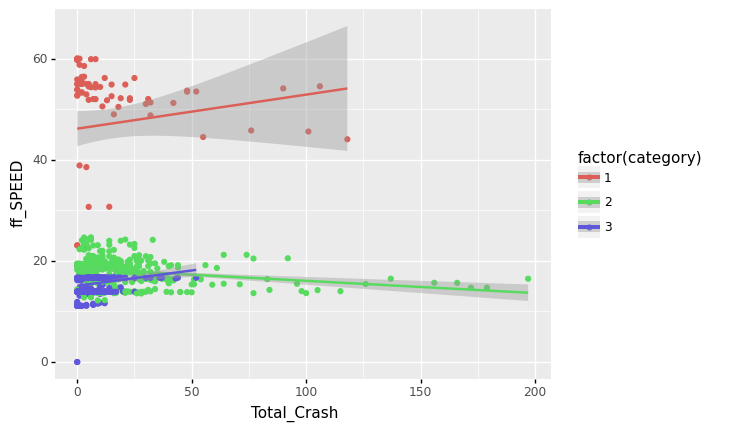

<ggplot: (186163252221)>

In [13]:
dfcrashes_sample = dfmerged.loc[dfmerged["Tot_VMT"]<460000]
(
    (ggplot(dfcrashes_sample, aes("Total_Crash","ff_SPEED",color="factor(category)"))
     + geom_point()
     + stat_smooth(method='lm'))
)
# Not much different from CSPD_1

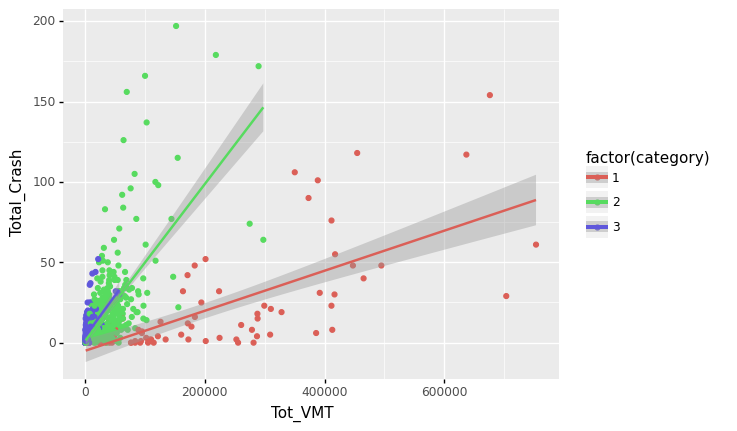

<ggplot: (186163260290)>

In [14]:
dfmerged_sample = dfmerged.copy()
(ggplot(dfmerged_sample, aes("Tot_VMT","Total_Crash",color="factor(category)"))
+ geom_point()
 + stat_smooth(method='lm'))

# We see more number of crashes in arterial road network compared to other category.
# Category 1 which is highway network has very high VMTs especially >4.5lakhs, what if I drop them?

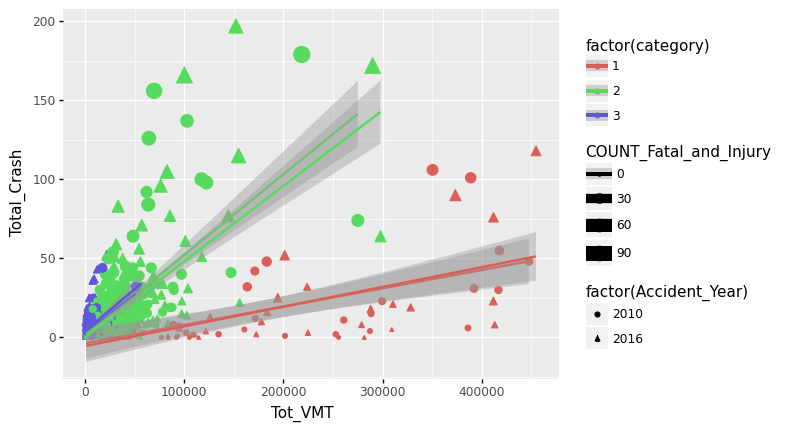

<ggplot: (186163193266)>

In [15]:
dfmerged_sample = dfmerged.loc[dfmerged["Tot_VMT"]<460000]
(ggplot(dfmerged_sample, aes("Tot_VMT","Total_Crash",color="factor(category)",size="COUNT_Fatal_and_Injury",shape="factor(Accident_Year)"))
 + geom_point()
 + stat_smooth(method='lm'))

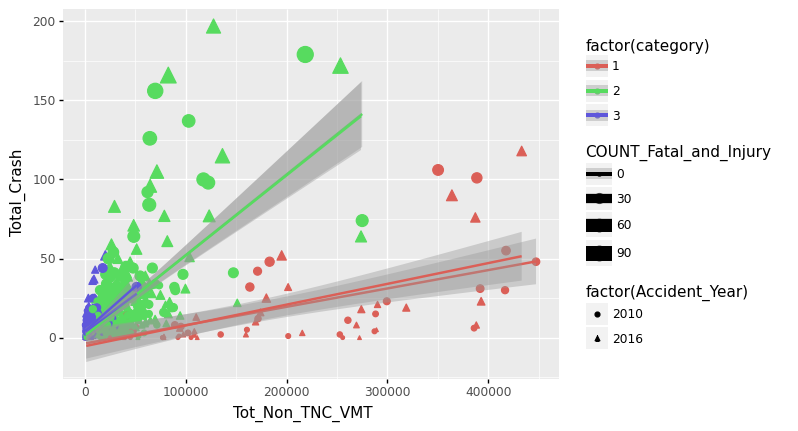

<ggplot: (186164384790)>

In [16]:
# What if I split VMT in two parts: Non_TNC_VMT and TNC_VMT?
# not much different than Tot_VMT overall
# dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000) & (dfmerged["category"]==3)]
dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000)]
(ggplot(dfmerged_sample, aes("Tot_Non_TNC_VMT","Total_Crash",color="factor(category)",size="COUNT_Fatal_and_Injury",shape="factor(Accident_Year)"))
 + geom_point()
 + stat_smooth(method='lm')
 )

# I think
# category 1 is much more linear in nature
# category 2 is much sharper (square)
# category 3 is much denser, compact and rises shallower


C:\Users\vsgo222\.virtualenvs\python_virtual_env-DJ2NW_7b\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\vsgo222\.virtualenvs\python_virtual_env-DJ2NW_7b\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\vsgo222\.virtualenvs\python_virtual_env-DJ2NW_7b\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


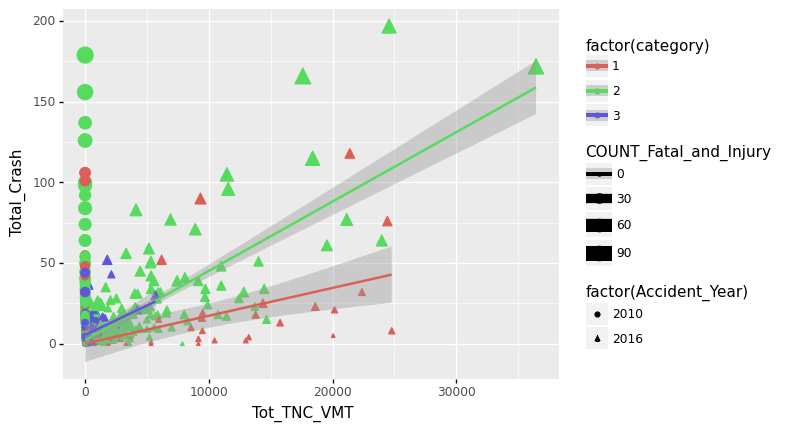

<ggplot: (186162568888)>

In [17]:
dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000)]
(ggplot(dfmerged_sample, aes("Tot_TNC_VMT","Total_Crash",color="factor(category)",size="COUNT_Fatal_and_Injury",shape="factor(Accident_Year)"))
 + geom_point()
 + stat_smooth(method='lm')
 )

In [18]:
# What about VMT vs speed (CSPD and ff_SPEED)

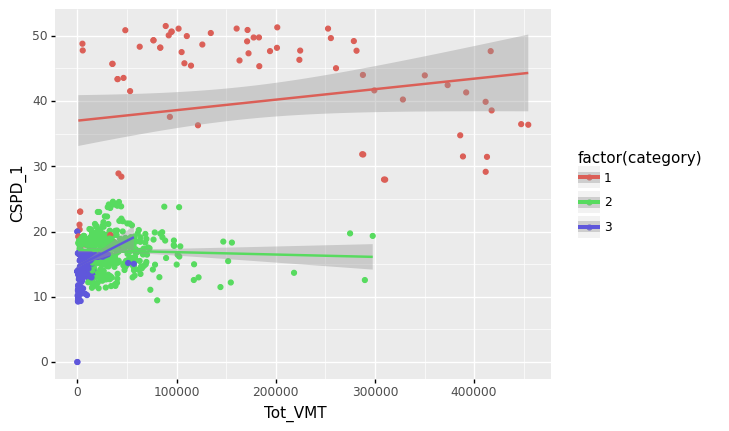

<ggplot: (186163252071)>

In [19]:
dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000)]
(ggplot(dfmerged_sample,
        aes("Tot_VMT","CSPD_1",color="factor(category)")
        )
 + geom_point()
 + stat_smooth(method='lm')
 )
# ,shape="factor(Accident_Year)"
# I think Tot_VMT vs CSPD
# Category 1 =  curved relationship
# Category 2 = noisy
# Category 3 = somewhat linear

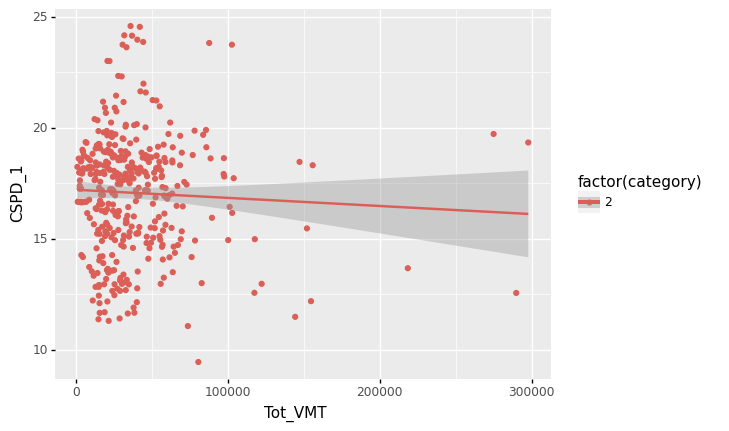

<ggplot: (186165016573)>

In [20]:
dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000) & (dfmerged["category"]==2)]
(
        ggplot(dfmerged_sample,
        aes("Tot_VMT","CSPD_1",color="factor(category)")
        )
        + geom_point()
        + stat_smooth(method='lm')
 )

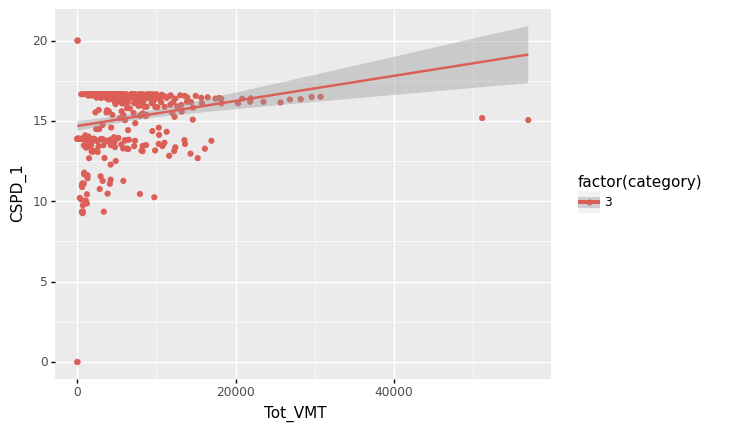

<ggplot: (186165284371)>

In [21]:
dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000) & (dfmerged["category"]==3)]
(ggplot(dfmerged_sample,
        aes("Tot_VMT","CSPD_1",color="factor(category)")
        )
 + geom_point()
 + stat_smooth(method='lm')
 )
# ,shape="factor(Accident_Year)"
# I think Tot_VMT vs CSPD
# Category 1 =  curved relationship
# Category 2 = noisy
# Category 3 = somewhat linea

In [22]:
# PUDO vs SPEED?

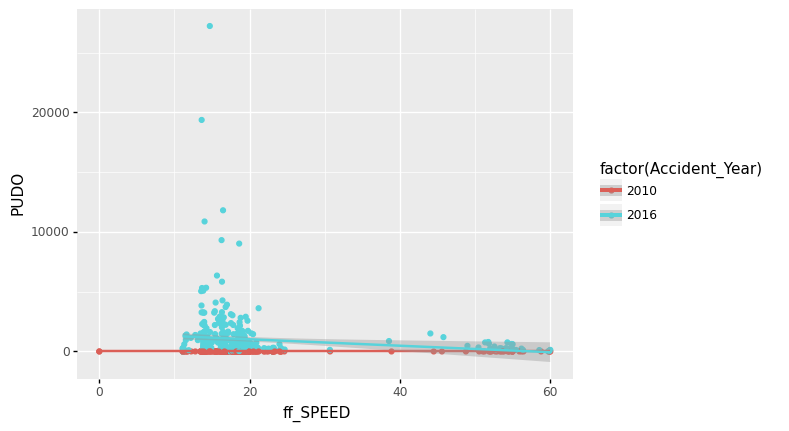

<ggplot: (186165299610)>

In [23]:
dfmerged_sample = dfmerged.loc[(dfmerged["Tot_VMT"]<460000)]
(ggplot(dfmerged_sample,
        aes("ff_SPEED","PUDO",color="factor(Accident_Year)")
        )
 + geom_point()
 + stat_smooth(method='lm')
 )

C:\Users\vsgo222\.virtualenvs\python_virtual_env-DJ2NW_7b\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\vsgo222\.virtualenvs\python_virtual_env-DJ2NW_7b\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\vsgo222\.virtualenvs\python_virtual_env-DJ2NW_7b\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


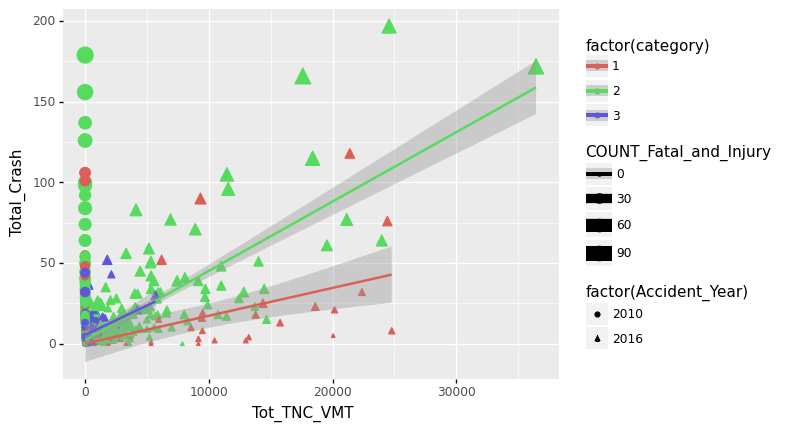

<ggplot: (186165433585)>

In [24]:
dfmerged_sample = dfmerged.loc[dfmerged["Tot_VMT"]<460000]
(ggplot(dfmerged_sample, aes("Tot_TNC_VMT","Total_Crash",color="factor(category)",size="COUNT_Fatal_and_Injury",shape="factor(Accident_Year)"))
 + geom_point()
 + stat_smooth(method='lm')
 )

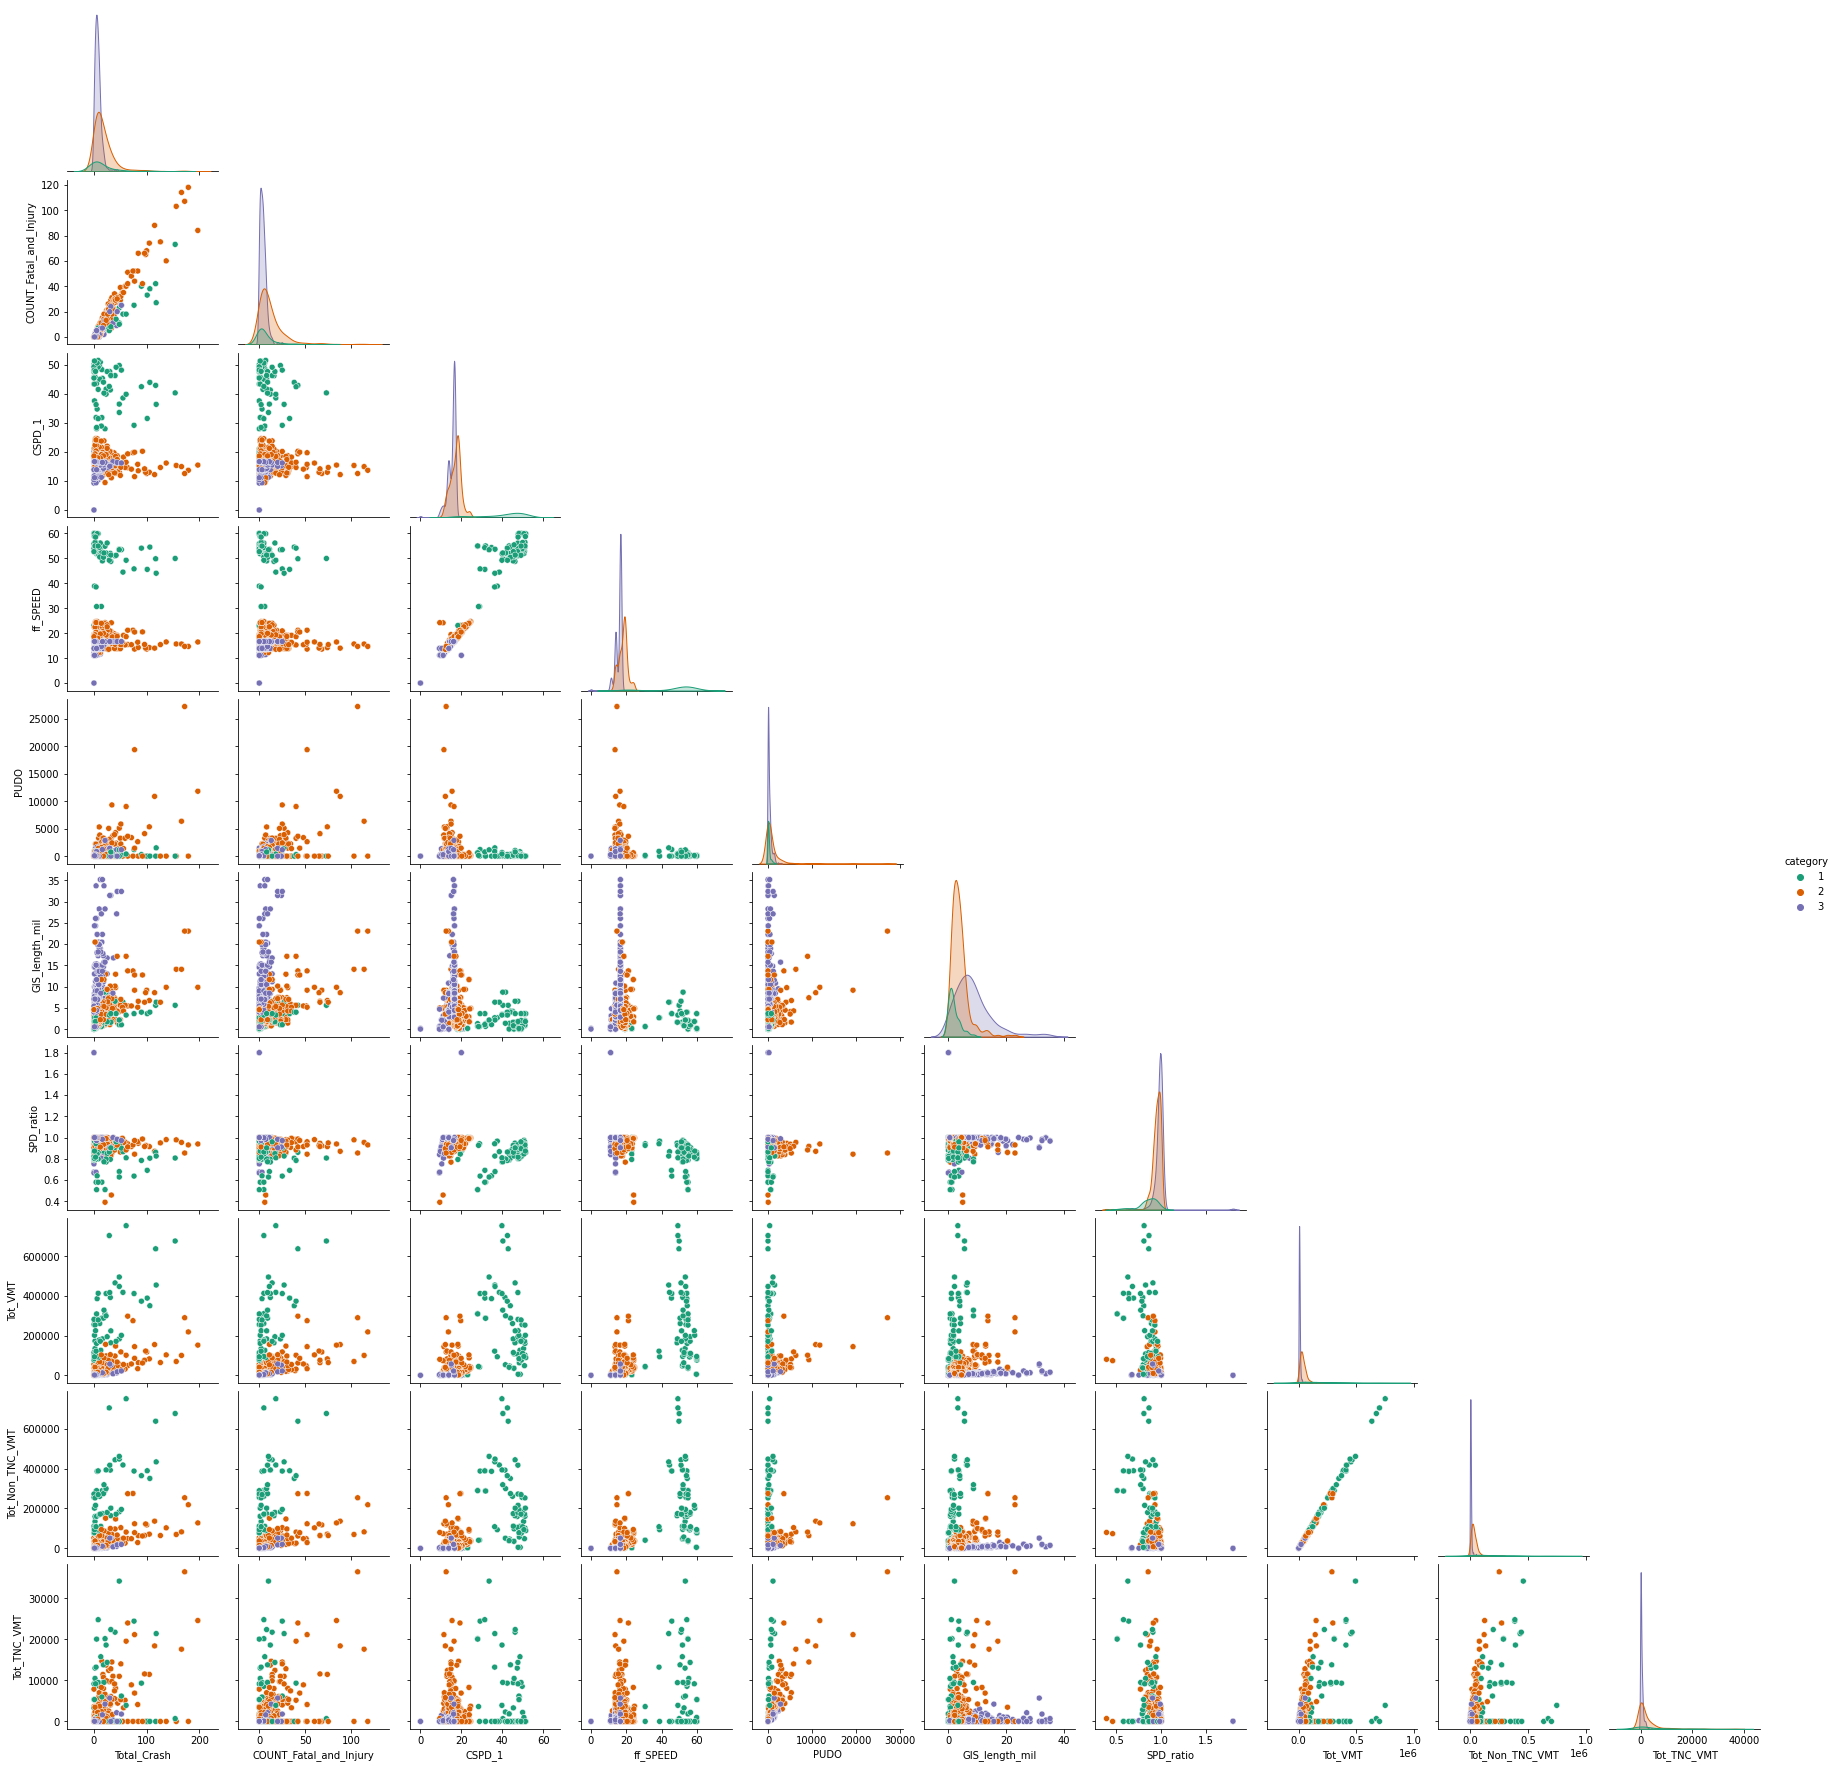

In [25]:
dfmerged_tractce = dfmerged.loc[:, ["Total_Crash","COUNT_Fatal_and_Injury","CSPD_1","ff_SPEED","PUDO","GIS_length_mil","SPD_ratio","category","Tot_VMT","Tot_Non_TNC_VMT","Tot_TNC_VMT"]]
sns.pairplot(dfmerged_tractce, hue="category", palette='Dark2',corner=True)

In [24]:
# Base dataframe
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

In [47]:
# re-proportionate the PUDO which were on category 1 to category 2 & 3 depending upon their percentages in corresponding CTs
dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT
dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] / dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2 and 3 such that category PUDO volume in category 1 is 0
dfmerged["new_pct"].fillna(0,inplace=True)
dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
dfmerged[["tractce10","category","Accident_Year","PUDO",'PCT_PUDO',"new_pct","new_PUDO"]]

,tractce10,category,Accident_Year,PUDO,PCT_PUDO,new_pct,new_PUDO
0,10100,2,2010,0.00000,0.000000,0.000000,0.00000
1,10100,2,2016,4588.14985,0.753531,0.753531,4588.14985
2,10100,3,2010,0.00000,0.000000,0.000000,0.00000
3,10100,3,2016,1500.71669,0.246469,0.246469,1500.71669
4,10200,2,2010,0.00000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...
841,980900,1,2016,774.71667,0.229249,0.000000,0.00000
842,980900,2,2010,0.00000,0.000000,0.000000,0.00000
843,980900,2,2016,1446.28331,0.427975,0.555270,1876.46003
844,980900,3,2010,0.00000,0.000000,0.000000,0.00000


In [43]:
dfsample = dfmerged.loc[(dfmerged["Accident_Year"]==2016) & (dfmerged["tractce10"]==18000)][["tractce10","category","PUDO",'PCT_PUDO']]
dfsample.loc[dfsample["category"]!=1,"new_pct"] = dfsample.loc[dfsample["category"]!=1]['PUDO'] / dfsample.loc[dfsample["category"]!=1].groupby('tractce10')['PUDO'].transform('sum')

dfsample

,tractce10,category,PUDO,PCT_PUDO,new_pct,new_PUDO
269,18000,1,1508.56670,10.611454,0.000000,0.00000
271,18000,2,11946.59992,84.033932,0.940097,13364.79942
273,18000,3,761.23337,5.354614,0.059903,851.60057


In [40]:
dfsample.groupby('tractce10')['PUDO'].agg(['sum'])

,sum
tractce10,
18000,14216.39999


In [22]:
PCT_PUDO = dfmerged.loc[dfmerged["Accident_Year"]==2016][dfmerged.groupby('tractce10')['category'].transform('first')>1]["PUDO"]/dfmerged.loc[dfmerged["Accident_Year"]==2016][dfmerged.groupby('tractce10')['category'].transform('first')>1].groupby('tractce10')['PUDO'].transform('sum')

C:\Users\Goyal\AppData\Local\Temp\ipykernel_28636\1699517314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Goyal\AppData\Local\Temp\ipykernel_28636\1699517314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [23]:
PCT_PUDO

1      0.753531
3      0.246469
5      0.655271
7      0.344729
9      0.430746
         ...   
831    0.292820
833    0.482030
835    0.517970
837    0.340920
839    0.659080
Name: PUDO, Length: 294, dtype: float64

In [8]:
ct=dfmerged.groupby('tractce10')
cattyps = ct.groupby("category")
for cat,frame in cattyps:
    print(frame.head(2))

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [9]:
# From Paul H
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})

In [11]:
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
state_office

sales
state office_id        
AZ    2          222579
      4          252315
      6          835831
CA    1          405711
      3          710581
      5          982371
CO    1          404137
      3          217952
      5          474564
WA    2          535829
      4          548242
      6          459783